# 군집분석
* KMeans
    * k개의 centeroid를 임의로 설정한 후, centeroid의 이동을 확인하면서 군집을 만들어간다.
    * 유클리드 거리

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import matplotlib
plt.rcParams['font.family'] = 'NanumGothic'

## 데이터 불러오기

In [3]:
path = '../datasets/ML_data/'

In [5]:
raw = pd.read_excel(path+'/Online_Retail.xlsx')
df = raw.copy()

print(df.shape)
df.head(2)

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## 데이터 준비 및 탐색

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
# quantity 확인
# 판매량이 (-)..? >> 정제 필요
df.Quantity.value_counts()

Quantity
 1        148227
 2         81829
 12        61063
 6         40868
 4         38484
           ...  
-472           1
-161           1
-1206          1
-272           1
-80995         1
Name: count, Length: 722, dtype: int64

In [9]:
# 단위 당 가격 확인 >> 소수점 존재함..
df.UnitPrice.value_counts()

UnitPrice
1.25      50496
1.65      38181
0.85      28497
2.95      27768
0.42      24533
          ...  
84.21         1
46.86         1
28.66         1
156.45        1
224.69        1
Name: count, Length: 1630, dtype: int64

In [10]:
df.CustomerID.value_counts()

CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: count, Length: 4372, dtype: int64

In [11]:
df.CustomerID.isnull().sum()

135080

In [13]:
condition1 = (df.Quantity > 0)
condition2 = (df.UnitPrice > 0)
condition3 = (df.CustomerID.notnull())

df = df[condition1 & condition2 & condition3]
print(df.shape)
df.head(2)

(397884, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int32         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.8+ MB


In [15]:
# CustomerID int로 변경하기
df.CustomerID = df.CustomerID.astype(int)

C:\Users\tjdtn\AppData\Local\Temp\ipykernel_32948\3382948830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.CustomerID = df.CustomerID.astype(int)


In [18]:
# 중복된 것이 있는지 확인
df.drop_duplicates(inplace=True)
print(df.shape)
df.info()

(392692, 8)
<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int32         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.5+ MB


C:\Users\tjdtn\AppData\Local\Temp\ipykernel_32948\4266208410.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


## EDA

### 사용할 데이터 따로 만들기

In [20]:
df.StockCode.value_counts() # 제품 수 : 3665

StockCode
85123A    2023
22423     1713
85099B    1615
84879     1395
47566     1389
          ... 
90059A       1
20678        1
90059D       1
90168        1
23843        1
Name: count, Length: 3665, dtype: int64

In [21]:
# 제품수, 거래건수, 고객수 알아보기
pd.DataFrame([
    {
        'Product' : len(df.StockCode.value_counts()),
        'Transaction' : len(df.InvoiceNo.value_counts()),
        'Customer' : len(df.CustomerID.value_counts())   
    }],
    index=['counts']
)

,Product,Transaction,Customer
counts,3665,18532,4338


In [22]:
# 국적 알아보기
df.Country.value_counts()

Country
United Kingdom          349203
Germany                   9025
France                    8326
EIRE                      7226
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1453
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45


In [24]:
# 주문금액 컬럼 추가하기
# 제품 단가 x 주문 개수 = 주문 금액
df['SaleAmount'] = df.UnitPrice * df.Quantity
df.head(2)

C:\Users\tjdtn\AppData\Local\Temp\ipykernel_32948\1974281136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SaleAmount'] = df.UnitPrice * df.Quantity


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [27]:
# 각 고객의 정보 추출하기 --> DF 만들기
# CustomerID를 기준으로 그룹 만들기
# 주문 횟수 계산 --> InvoiceNo : count
# 주문 금액 총액 --> SaleAmount : sum
# 주문일 중 최근 날짜 --> InvoiceDate : max

aggregations = \
{
    'InvoiceNo' : 'count',
    'SaleAmount' : 'sum',
    'InvoiceDate' : 'max'
}

customers = df.groupby('CustomerID').agg(aggregations).reset_index()
customers.head(2)

,CustomerID,InvoiceNo,SaleAmount,InvoiceDate
0,12346,1,77183.6,2011-01-18 10:01:00
1,12347,182,4310.0,2011-12-07 15:52:00


In [28]:
# customers DF의 컬럼명 변경해주기
customers = customers.rename(columns={'InvoiceNo' : 'Freq', 'InvoiceDate' : 'ElapsedDays'})
customers.head(2)

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.6,2011-01-18 10:01:00
1,12347,182,4310.0,2011-12-07 15:52:00


In [30]:
import datetime

# 마지막 주문일로부터 며칠이 지났는지에 대한 값을 ElapsedDays 컬럼에 저장하기
# 기준 날짜 : 2011.12.10

customers['ElapsedDays'] = datetime.datetime(2011, 12, 10) - customers.ElapsedDays
customers.head(2)

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.6,325 days 13:59:00
1,12347,182,4310.0,2 days 08:08:00


In [32]:
# 날짜 수로 환산해서 ElapsedDays를 구하기

customers.ElapsedDays = customers.ElapsedDays.apply(lambda x : x.days+1)
customers.head(2)

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.6,326
1,12347,182,4310.0,3


### 데이터 값 분포 확인하기

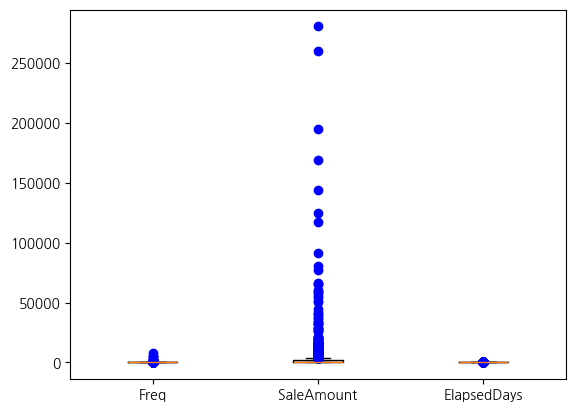

In [33]:
fig, ax = plt.subplots()

ax.boxplot([customers.Freq, customers.SaleAmount, customers.ElapsedDays],
           sym='bo')
# x축 눈금명 변경
plt.xticks([1, 2, 3], ['Freq', 'SaleAmount', 'ElapsedDays'])
plt.show()

* 위의 boxplot이 이상치로 잘 그려지지 않아 로그변환을 이용해 데이터값의 분포를 맞춰준다.
    * 로그변환하는 이유 : 치우침 조절
    * 표준화 : 단위 통일

In [35]:
# log1p() : 주어진 숫자에 1을 더해서 자연로그 계산

customers['Freq_log'] = np.log1p(customers.Freq)
customers['SalesAmount_log'] = np.log1p(customers.SaleAmount)
customers['ElapsedDays_log'] = np.log1p(customers.ElapsedDays)
customers.head(2)

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SalesAmount_log,ElapsedDays_log
0,12346,1,77183.6,326,0.693147,11.253955,5.789960
1,12347,182,4310.0,3,5.209486,8.368925,1.386294


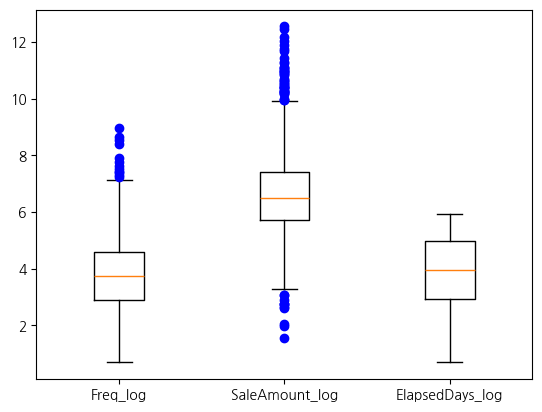

In [36]:
# 다시 boxplot 그려주기
fig, ax = plt.subplots()

ax.boxplot([customers.Freq_log, customers.SalesAmount_log, customers.ElapsedDays_log],
           sym='bo')
# x축 눈금명 변경
plt.xticks([1, 2, 3], ['Freq_log', 'SaleAmount_log', 'ElapsedDays_log'])
plt.show()

## 모델링 - KMeans

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [42]:
X_features = customers[['Freq_log', 'SalesAmount_log', 'ElapsedDays_log']].values
X_features

array([[ 0.69314718, 11.25395523,  5.78996017],
       [ 5.20948615,  8.36892517,  1.38629436],
       [ 3.4657359 ,  7.49456369,  4.34380542],
       ...,
       [ 2.56494936,  5.1876651 ,  2.19722458],
       [ 6.58202514,  7.62390095,  1.60943791],
       [ 4.26267988,  7.51658563,  3.78418963]])

In [41]:
# 정규분포로 scaling해야 한다. (서로 단위가 틀린 속성 정보를 지님.)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_features_scaled = scaler.fit_transform(X_features)
X_features_scaled

array([[-2.43820181,  3.7077163 ,  1.47888429],
       [ 1.18898578,  1.41490344, -1.89064214],
       [-0.21146474,  0.72002428,  0.37233877],
       ...,
       [-0.9349095 , -1.11333158, -1.27014755],
       [ 2.29130702,  0.82281217, -1.71990073],
       [ 0.42858139,  0.73752572, -0.05585907]])

### 최적의 K값 찾기

* inertia_ : kmeans에서 각 centroid와 해당 cluster에 속한 데이터 포인트 간 제곱 거리의 합

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\clust

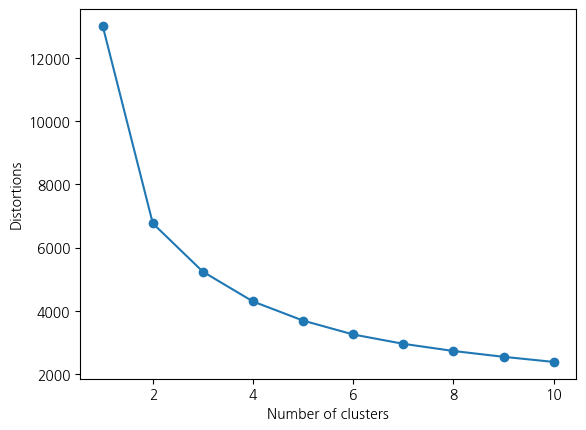

In [46]:
# Elbow

distortions = []

for i in range(1, 11):
    # 모델 생성
    kmeans = KMeans(n_clusters=i, random_state=42)
    # 모델 훈련
    kmeans.fit(X_features_scaled)
    distortions.append(kmeans.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortions')
plt.show()

In [48]:
# k = 3일 때
kmeans = KMeans(n_clusters=3, random_state=42)

# 모델이 예측한 값
y_pred = kmeans.fit_predict(X_features_scaled)
y_pred

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 0, ..., 0, 1, 0])

In [49]:
customers.head(2)

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SalesAmount_log,ElapsedDays_log
0,12346,1,77183.6,326,0.693147,11.253955,5.789960
1,12347,182,4310.0,3,5.209486,8.368925,1.386294


In [50]:
customers['cluster'] = y_pred
customers.head(2)

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SalesAmount_log,ElapsedDays_log,cluster
0,12346,1,77183.6,326,0.693147,11.253955,5.789960,0
1,12347,182,4310.0,3,5.209486,8.368925,1.386294,1


In [52]:
# 군집별 개수 파악
customers.cluster.value_counts()

cluster
0    1830
2    1511
1     997
Name: count, dtype: int64

## 결과 분석 및 시각화하기

In [59]:
# 최적의 K 찾기
# 실루엣 점수
from matplotlib import cm

def silhoutte_viz(k, x_features):
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(x_features)

    silhoutte_values = silhouette_samples(x_features, y_pred, metric='euclidean')

    # 초기화
    y_ax_lower, y_ax_higher = 0, 0
    y_ticks = []

    for c in range(k):
        c_silhouette = silhoutte_values[y_pred == c]
        c_silhouette.sort()
        y_ax_higher += len(c_silhouette)

        color = cm.jet(float(c) / k)
        plt.barh(range(y_ax_lower, y_ax_higher), c_silhouette, height=1.0, edgecolor='none', color=color)

        y_ticks.append((y_ax_lower + y_ax_higher) / 2.)
        y_ax_lower += len(c_silhouette)

    silhouette_avg = np.mean(silhoutte_values)
    print(silhouette_avg)
    plt.axvline(silhouette_avg, color='red', linestyle='--')
    plt.title('Number of Cluster : ' + str(k) + '\nSilhouette Score : ' + str(round(silhouette_avg, 3)))
    plt.ylabel('Cluster')
    plt.yticks(y_ticks, range(k))
    plt.xlabel('Silhouette coefficient')
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    plt.tight_layout()
    plt.show()
    

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.3035049678534824


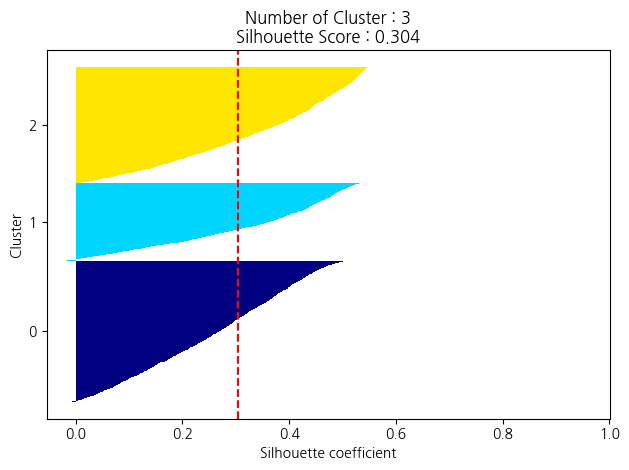

In [60]:
silhoutte_viz(3, X_features_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.3090037245277387


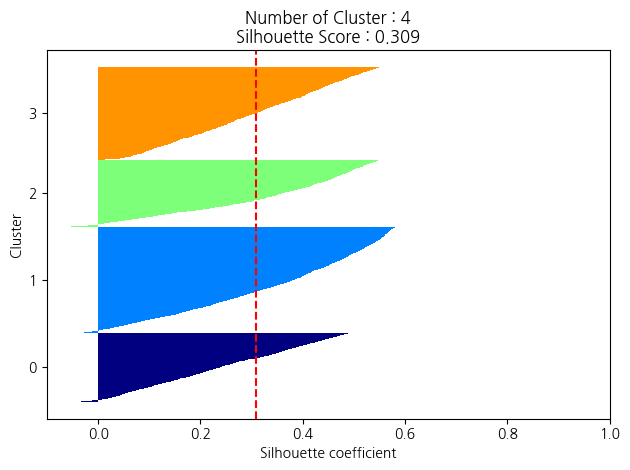

In [63]:
silhoutte_viz(4, X_features_scaled)

### Cluster 수에 따른 cluster 데이터 분포 시각화 함수

In [69]:
def clusterScatter(k, x_features):
    c_color = []
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(x_features)

    # cluster 색 지정
    for i in range(k):
        color = cm.jet(float(i) / k)
        c_color.append(color)

        # cluster 안의 데이터 분포를 산점도로 표현 --> 동그라미로 시각화
        plt.scatter(x_features[y_pred == i, 0], x_features[y_pred == i, 1], 
                    marker='o', color=color, edgecolors='black', s=50,
                    label='cluster' + str(i))
        # centroid 표시 --> 별
    for i in range(k):
        plt.scatter(kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1], 
                    marker='*', color=c_color[i], edgecolors='white', s=200)

    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tjdtn\AppData\Local\Temp\ipykernel_32948\441325768.py:22: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


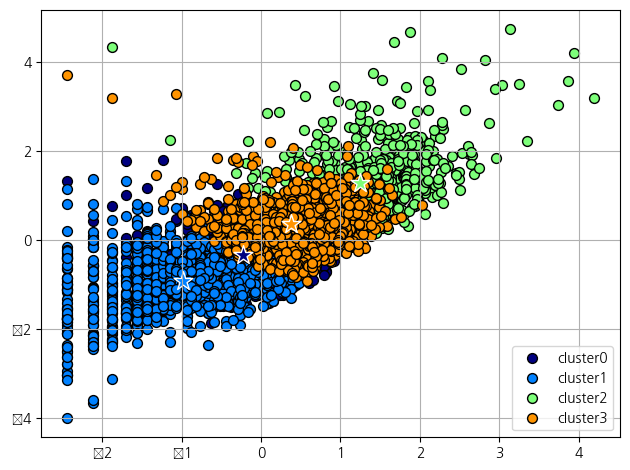

In [71]:
clusterScatter(4, X_features_scaled)

In [73]:
kmeans.cluster_centers_

array([[ 0.14815704,  0.08006983, -0.07034678],
       [ 1.18782972,  1.2215219 , -1.09002981],
       [-0.96604988, -0.90578407,  0.80694128]])

## 결정된 K를 적용해서 최적의 KMeans 모델 사용하기

In [74]:
best_k = 4

kmeans = KMeans(n_clusters=best_k, random_state=42)
y_pred = kmeans.fit_predict(X_features_scaled)
y_pred

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 2, 3, ..., 0, 2, 3])

In [75]:
customers['cluster'] = y_pred

In [76]:
customers.head(2)

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SalesAmount_log,ElapsedDays_log,cluster
0,12346,1,77183.6,326,0.693147,11.253955,5.789960,3
1,12347,182,4310.0,3,5.209486,8.368925,1.386294,2


In [91]:
clusters = \
pd.DataFrame(data={'count' : customers.cluster.value_counts().values},
             index=customers.cluster.value_counts().index).sort_index()
clusters

,count
cluster,
0,895
1,1370
2,872
3,1201


## 군집별 특징 확인하기

In [92]:
customers.groupby('cluster')['CustomerID'].count()

cluster
0     895
1    1370
2     872
3    1201
Name: CustomerID, dtype: int64

In [93]:
customers.columns

Index(['CustomerID', 'Freq', 'SaleAmount', 'ElapsedDays', 'Freq_log',
       'SalesAmount_log', 'ElapsedDays_log', 'cluster'],
      dtype='object')

In [94]:
customer_df = customers.drop(columns=['Freq_log', 'SalesAmount_log', 'ElapsedDays_log'])
customer_df.head(2)

,CustomerID,Freq,SaleAmount,ElapsedDays,cluster
0,12346,1,77183.6,326,3
1,12347,182,4310.0,3,2


In [95]:
# 주문 1회당 평균 구매 금액 : SalesAmountAVG

customer_df['SaleAmountAVG'] = customer_df['SaleAmount'] / customer_df['Freq']
customer_df.head(2)

,CustomerID,Freq,SaleAmount,ElapsedDays,cluster,SaleAmountAVG
0,12346,1,77183.6,326,3,77183.600000
1,12347,182,4310.0,3,2,23.681319


In [96]:
# 클러스터별로 분석하기
customerAVG_df = customer_df.drop(columns=['CustomerID']).groupby('cluster').mean()
customerAVG_df

,Freq,SaleAmount,ElapsedDays,SaleAmountAVG
cluster,,,,
0,38.349721,608.202806,20.870391,32.118196
1,14.964234,297.675402,187.294891,43.291973
2,278.464450,7020.739553,13.612385,96.665836
3,79.139883,1509.548037,97.043297,103.489540


In [97]:
customerAVG_df.index += 1
customerAVG_df

,Freq,SaleAmount,ElapsedDays,SaleAmountAVG
cluster,,,,
1,38.349721,608.202806,20.870391,32.118196
2,14.964234,297.675402,187.294891,43.291973
3,278.464450,7020.739553,13.612385,96.665836
4,79.139883,1509.548037,97.043297,103.489540
